In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv("C:\\Users\\jeet3\\Desktop\\Kaggle dataset\\heart.csv")
dataset.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jeet3\\Desktop\\Kaggle dataset\\heart.csv'

In [2]:
dataset_b = dataset['output']
dataset.drop('output', axis = 1, inplace = True)

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [6]:
df = pd.read_csv("/Users/yangzhongxuan/Library/Containers/com.microsoft.Excel/Data/Desktop/ALY6140 Python Analytics/heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
y = df.output.values

In [12]:
x = df.drop(columns = 'output', axis = 1)

In [15]:
 # seperate the train and test to 80/20
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

# Decision Tree

In [16]:
# fit the decision tree training and generate the prediction for testing set
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
predictions = dtc.predict(test_x)

In [17]:
print('Accuracy Score:', accuracy_score(test_y, predictions))
print('Classification Report \n', classification_report(test_y, predictions))

Accuracy Score: 0.7377049180327869
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



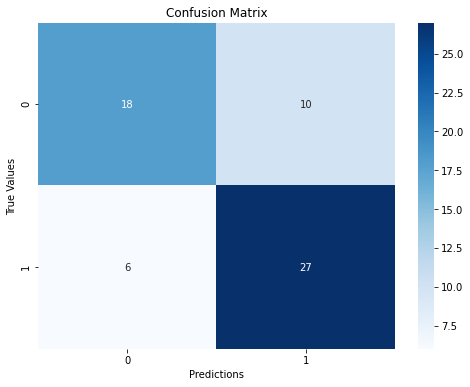

In [20]:
cm = confusion_matrix(test_y, predictions)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Algorithm

In [21]:
y = df.output.values
x = df.drop(columns = 'output', axis = 1)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

In [22]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(train_x, train_y)
predictions = rf.predict(test_x)

In [23]:
print("Accuracy Score :",accuracy_score(test_y,predictions))
print("Classification Report \n",classification_report(test_y,predictions))

Accuracy Score : 0.8360655737704918
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



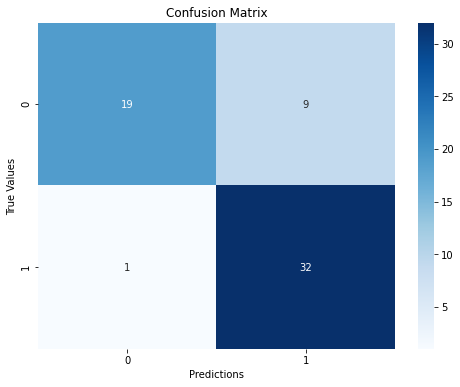

In [24]:
cm = confusion_matrix(test_y,predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

In [3]:
dataset.isna().sum().sort_values()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

In [4]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
lista = ['sex', 'cp', 'restecg', 'slp', 'thall']
columns = dataset[lista]

In [6]:
qualihot = onehot.fit_transform(columns)
quali_one_df = pd.DataFrame(qualihot.toarray(), columns = onehot.get_feature_names_out())

In [7]:
dataset = pd.concat([dataset.drop(lista, axis = 1), quali_one_df.astype('int')], axis = 1)

In [8]:
dataset.dtypes

age            int64
trtbps         int64
chol           int64
fbs            int64
thalachh       int64
exng           int64
oldpeak      float64
caa            int64
sex_0          int64
sex_1          int64
cp_0           int64
cp_1           int64
cp_2           int64
cp_3           int64
restecg_0      int64
restecg_1      int64
restecg_2      int64
slp_0          int64
slp_1          int64
slp_2          int64
thall_0        int64
thall_1        int64
thall_2        int64
thall_3        int64
dtype: object

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_temp = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)

In [11]:
features = dataset
num_clusters = None
hierarchical_clustering = AgglomerativeClustering(n_clusters = num_clusters, distance_threshold = 20, compute_distances = True)
hierarchical_labels = hierarchical_clustering.fit_predict(features)
silhouette_avg = silhouette_score(features, hierarchical_labels)
print('Coefficient Silueta:', silhouette_avg)
plt.figure(figsize=(16, 6))

Coefficient Silueta: 0.24556338680504403


<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

# 1. What is the relationship between thalechh, age and viridis? 
# 2. Does age have positive influence or negative influence on thalachh?

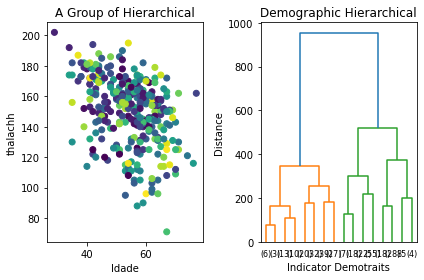

In [13]:

plt.subplot(1, 2, 1)
plt.scatter(features['age'], features['thalachh'], c = hierarchical_labels, cmap = aa'viridis')
plt.xlabel('Idade')
plt.ylabel('thalachh')
plt.title('A Group of Hierarchical')

linkage_matrix = linkage(features, method = 'ward')

plt.subplot(1, 2, 2)
dendrogram(linkage_matrix, leaf_font_size = 8, truncate_mode = 'level', p=3)
plt.xlabel('Indicator Demotraits')
plt.ylabel('Distance')
plt.title('Demographic Hierarchical')

plt.tight_layout()
plt.show()

In [29]:
# 3. What is average score of cluster or KNN sorting? 
# 4. How is the coefficient relationship between cholestro and thalassemia? Will the cholestro cause the thalachh is what level? 
# 5. What is the peak number of the thalassemia influence on cholestro? 
# 6. What is the closest number for cholestro to evoke thalassemia? 

def hierarchy_plot(features, num_clusters=2, levels= 2, method='ward', cols: list = None, use_col: bool=False, comp: bool=True):
    if use_col:
        features = features[cols]
    hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=method)
    hierarchical_labels = hierarchical_clustering.fit_predict(features)

    silhouette_avg = silhouette_score(features, hierarchical_labels)
    print("Coefficient Silhueta:", silhouette_avg)
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(features[cols[0]],
                 features[cols[1]], c=hierarchical_labels, cmap='viridis')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    #title = 
    plt.title(f'A group method {num_clusters} clusters {method}')
    
    if comp:
        linkage_matrix = linkage(features, method=method)

        plt.subplot(1, 2, 2)
        dendrogram(linkage_matrix, leaf_font_size=8, truncate_mode='lastp', p=levels)
        plt.xlabel('Find distance the most')
        plt.ylabel('Distance')
        plt.title(f'Dangerous {levels} naivie')
        plt.tight_layout()
        plt.show()
    else:
        kmeans = KMeans(n_clusters=num_clusters, n_init=10)
        kmeans_labels = kmeans.fit_predict(features)
        silhouette_avg2 = silhouette_score(features, kmeans_labels)
        print("Coeficiente de Silhueta KMeans:", silhouette_avg2)
        plt.subplot(1, 2, 2)
        plt.scatter(features['chol'], features['thalachh'], c=kmeans_labels, cmap='viridis')
        plt.xlabel(cols[0])
        plt.ylabel(cols[1])
        plt.title(f' K-Means {num_clusters} classes')
        plt.show()
        

def grid_sc(features, n_clusters_lim = 5, metric: list=['euclidean'], linkage: list=['ward'], comp: bool=False):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import silhouette_score
    silhueta = 0
    dicio = {"n_clusters":0,"metric":"euclidean", "linkage":"ward"}
    for a in range(2,n_clusters_lim):
        for b in range(0, len(metric)):
            for c in range(0, len(linkage)):
                hierarchical_clustering = AgglomerativeClustering(n_clusters=a, metric=metric[b], linkage=linkage[c])
                hierarchical_labels = hierarchical_clustering.fit_predict(features)
                silhouette_avg = silhouette_score(features, hierarchical_labels)
                hierarchy_plot(dataset, num_clusters=a, levels=a, method=linkage[c], cols = ['chol', 'thalachh'], use_col=True, comp=comp)
                if silhouette_avg > silhueta:
                    dicio['n_clusters'] = a
                    dicio['metric'] = metric[b]
                    dicio['linkage'] = linkage[c]
                    silhueta = silhouette_avg
                        #print(silhouette_avg)
                    print(dicio)
                    
    return dicio

Coefficient Silhueta: 0.4488507562179368
Coeficiente de Silhueta KMeans: 0.44791615458967043


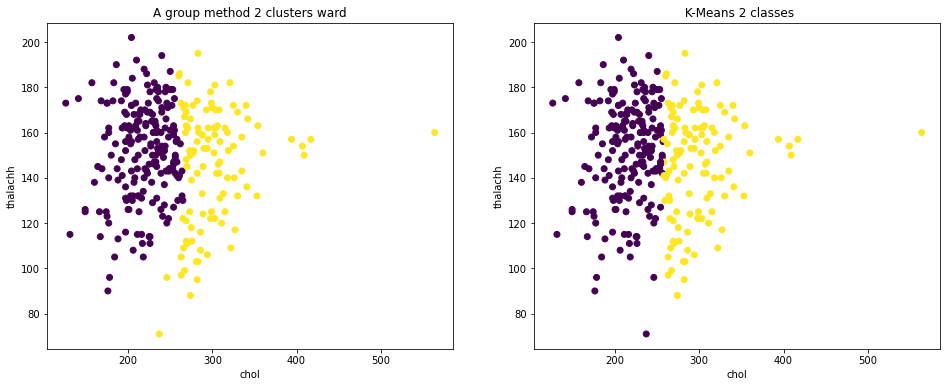

{'n_clusters': 2, 'metric': None, 'linkage': 'ward'}
Coefficient Silhueta: 0.7825503948363066
Coeficiente de Silhueta KMeans: 0.44791615458967043


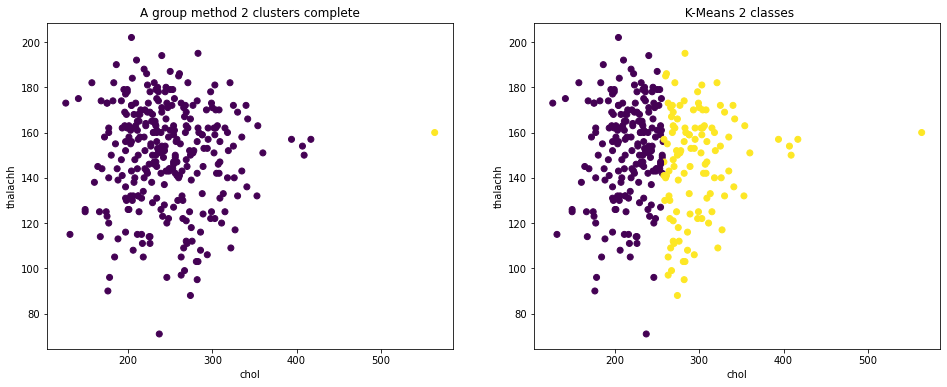

{'n_clusters': 2, 'metric': None, 'linkage': 'complete'}
Coefficient Silhueta: 0.6552101477165096
Coeficiente de Silhueta KMeans: 0.444502133600862


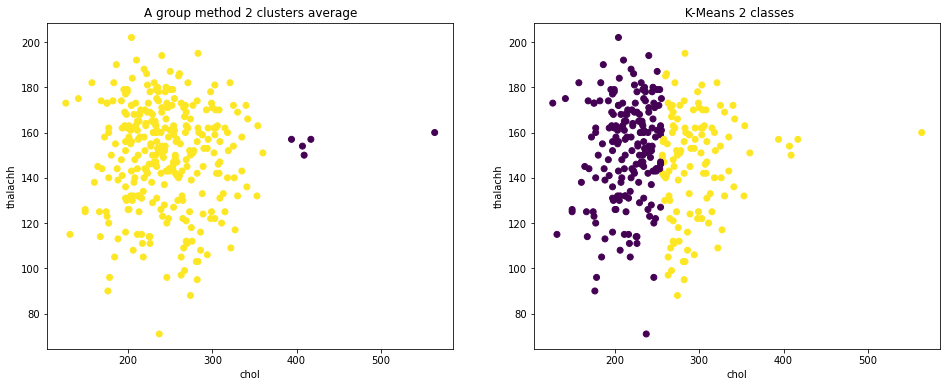

Coefficient Silhueta: 0.7825503948363066
Coeficiente de Silhueta KMeans: 0.44791615458967043


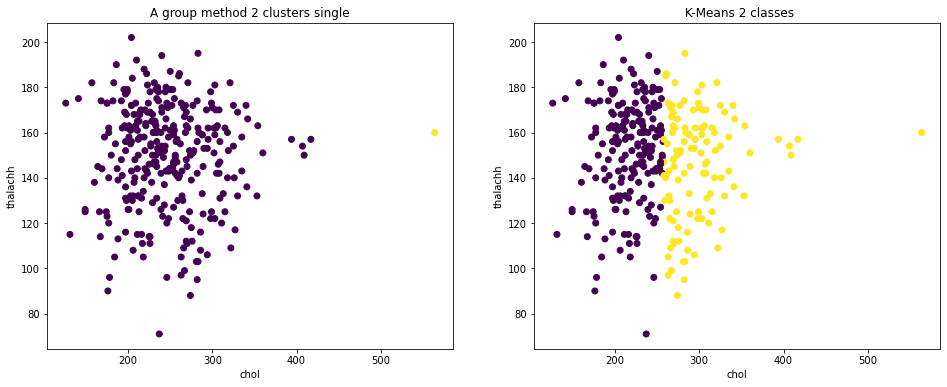

{'n_clusters': 2, 'metric': None, 'linkage': 'single'}
Coefficient Silhueta: 0.30023950012873885
Coeficiente de Silhueta KMeans: 0.35818502567091637


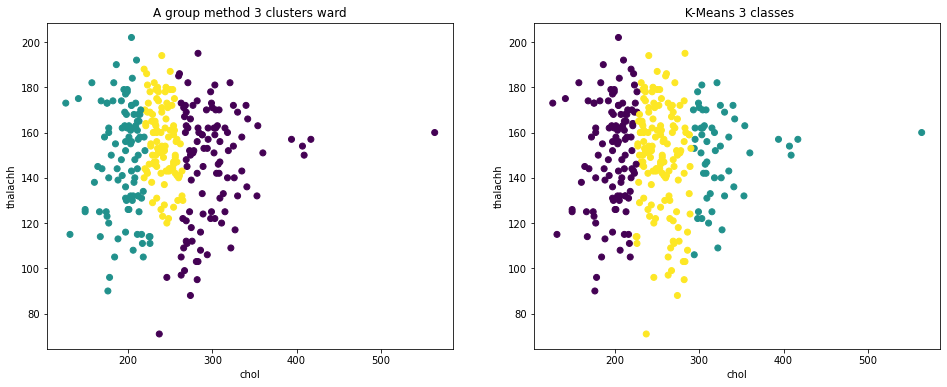

Coefficient Silhueta: 0.38592477492150346
Coeficiente de Silhueta KMeans: 0.35818502567091637


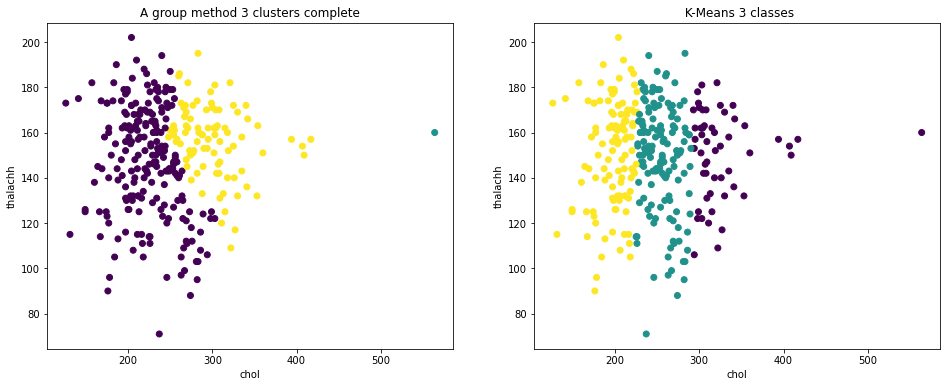

Coefficient Silhueta: 0.580930112738336
Coeficiente de Silhueta KMeans: 0.35818502567091637


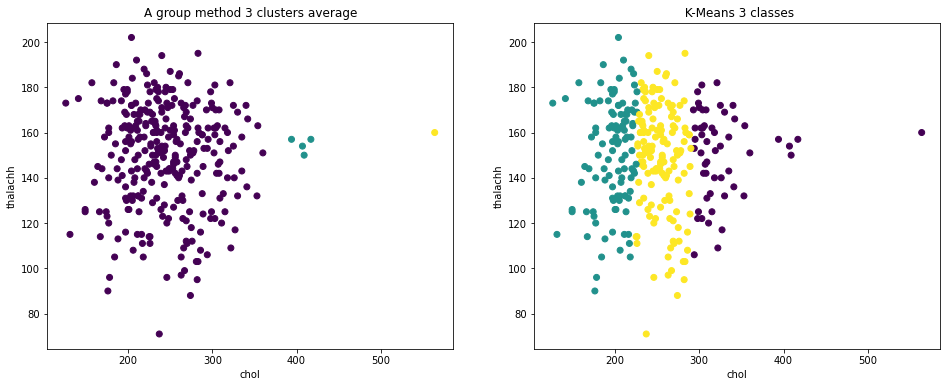

Coefficient Silhueta: 0.580930112738336
Coeficiente de Silhueta KMeans: 0.35818502567091637


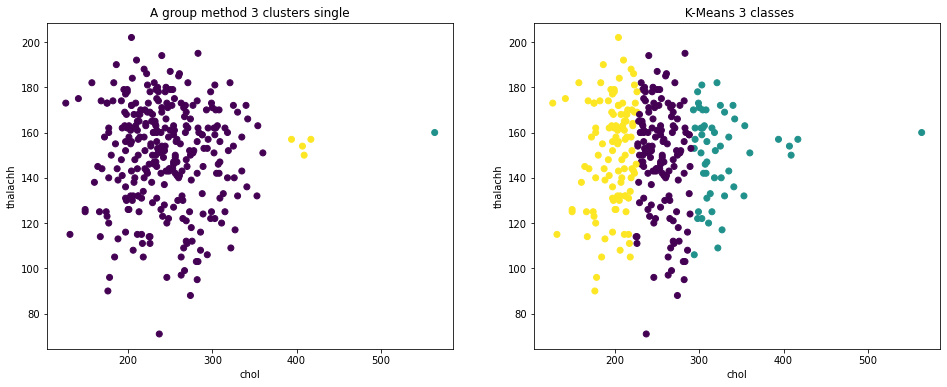

Coefficient Silhueta: 0.3212412175744463
Coeficiente de Silhueta KMeans: 0.3554130029205022


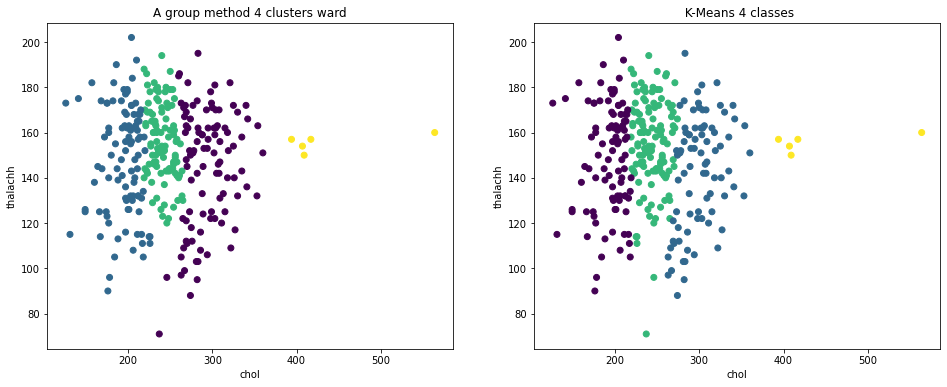

Coefficient Silhueta: 0.2896211791715441
Coeficiente de Silhueta KMeans: 0.3554130029205022


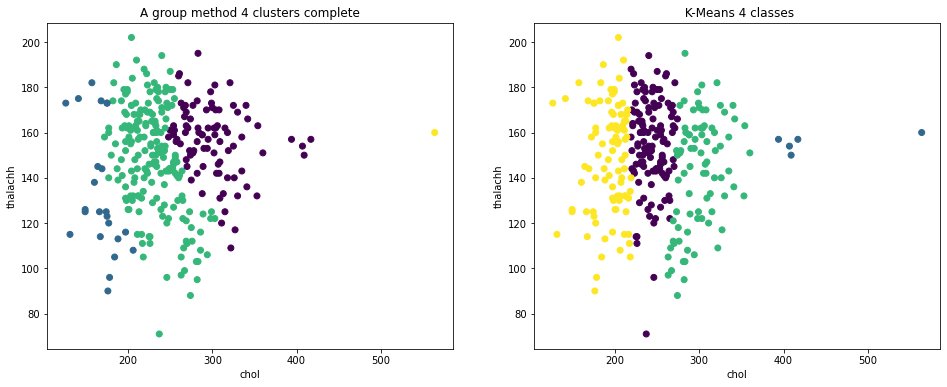

Coefficient Silhueta: 0.4268471839330211
Coeficiente de Silhueta KMeans: 0.35755820572299024


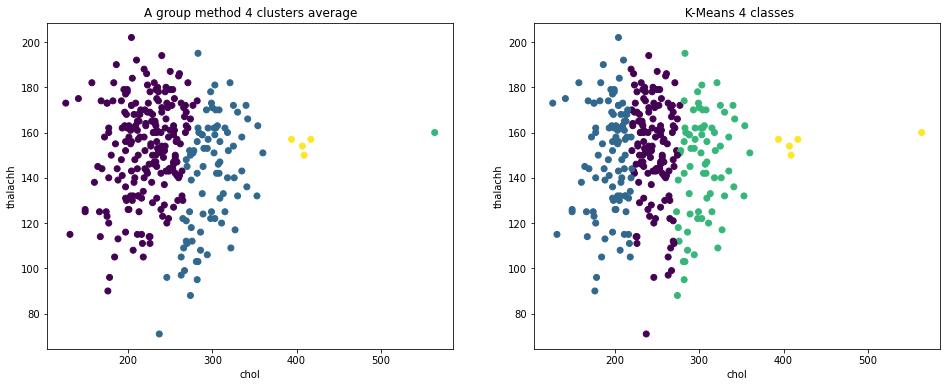

Coefficient Silhueta: 0.2651200606466084
Coeficiente de Silhueta KMeans: 0.35755820572299024


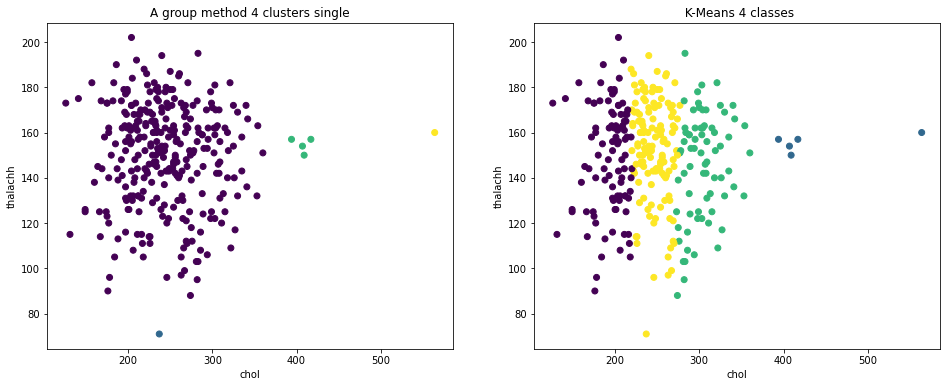

Coefficient Silhueta: 0.33571489763750506
Coeficiente de Silhueta KMeans: 0.36937839542312084


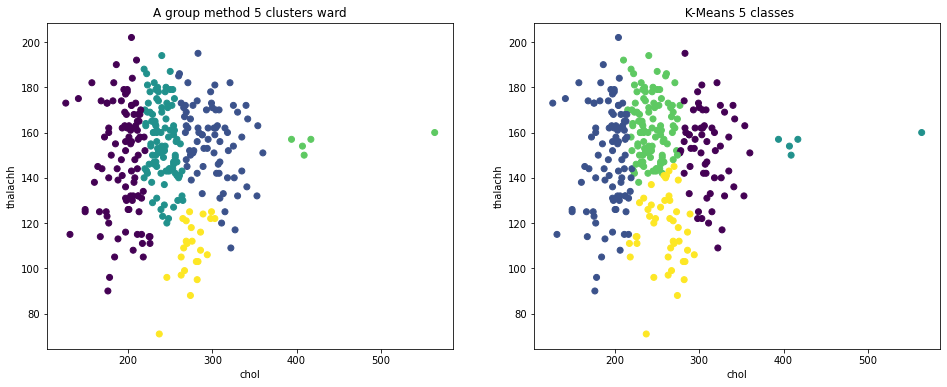

Coefficient Silhueta: 0.28013999372595105
Coeficiente de Silhueta KMeans: 0.3642152199884433


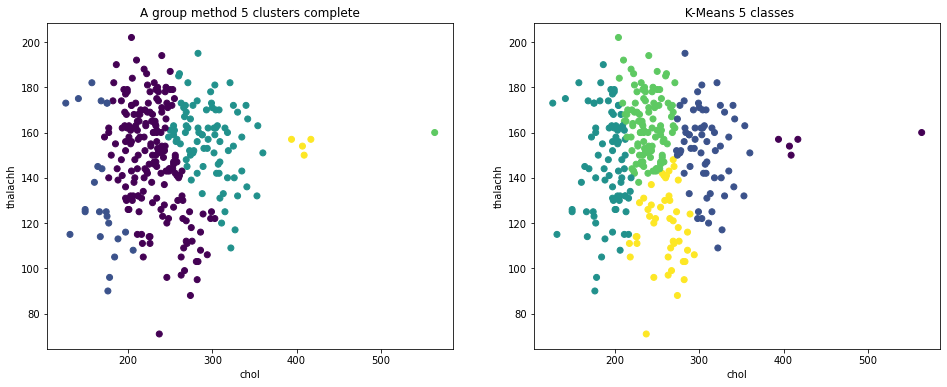

Coefficient Silhueta: 0.34104898030556596
Coeficiente de Silhueta KMeans: 0.35312504805417927


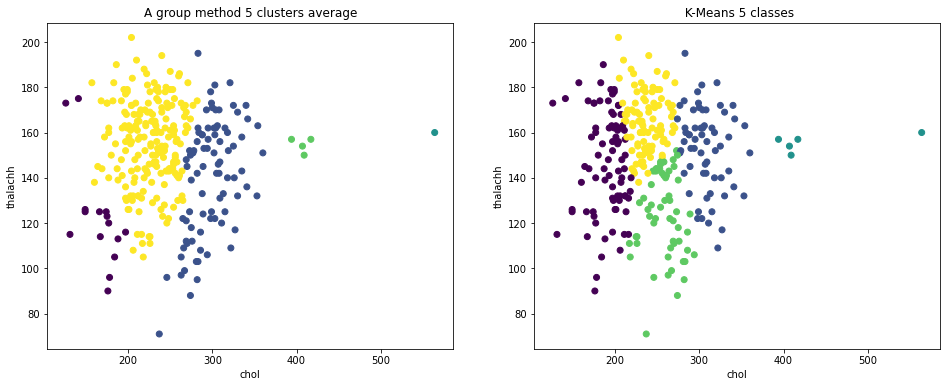

Coefficient Silhueta: 0.21091686107734542
Coeficiente de Silhueta KMeans: 0.3525994844851003


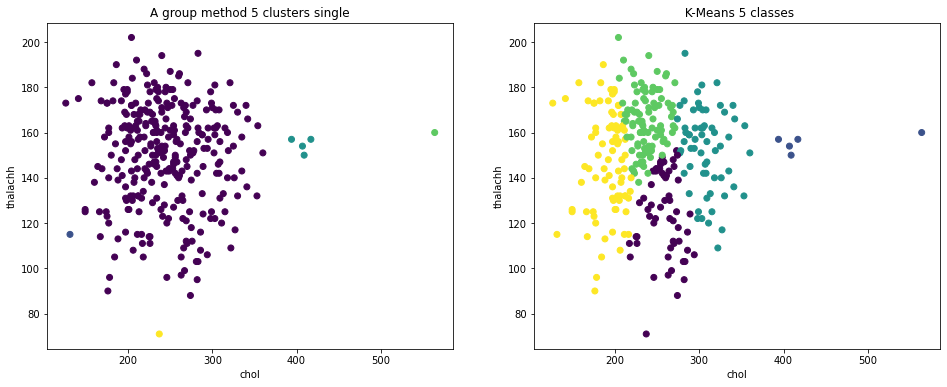

Coefficient Silhueta: 0.34312714989876647
Coeficiente de Silhueta KMeans: 0.36636269569822055


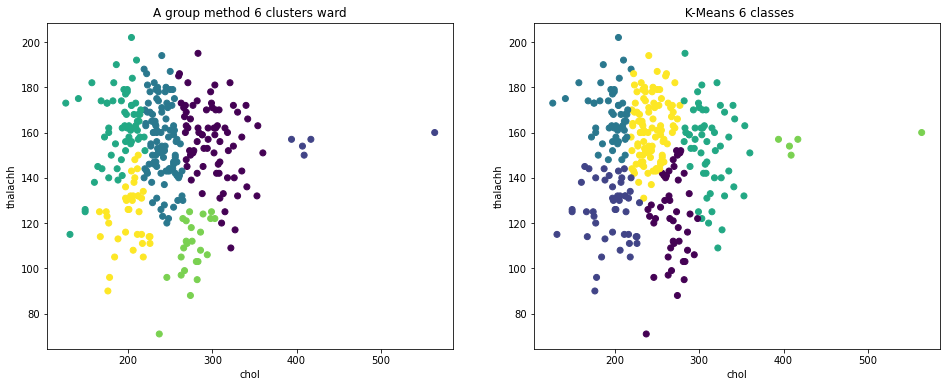

Coefficient Silhueta: 0.31730665244022943
Coeficiente de Silhueta KMeans: 0.36636269569822055


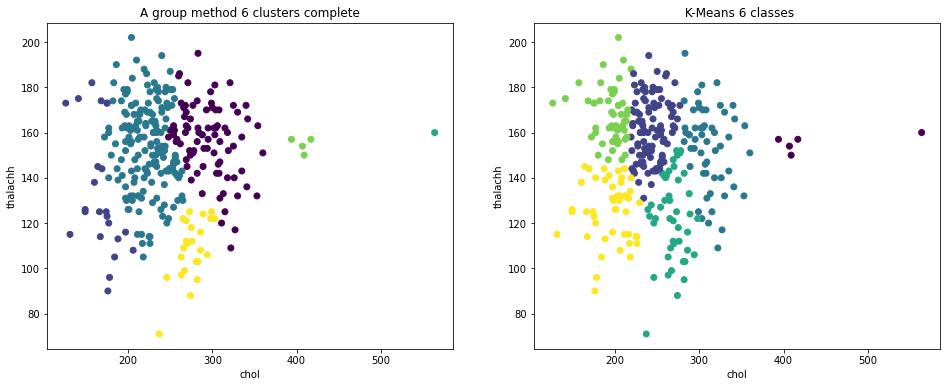

Coefficient Silhueta: 0.3215932718893809
Coeficiente de Silhueta KMeans: 0.3669762194771575


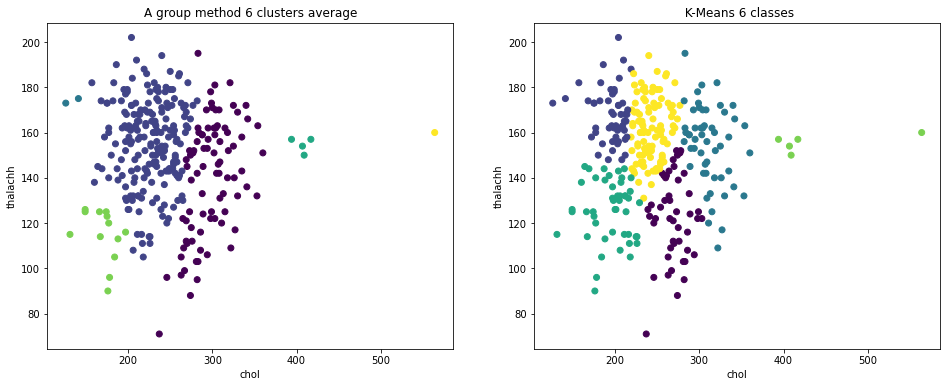

Coefficient Silhueta: -0.029057712669957478
Coeficiente de Silhueta KMeans: 0.36673009201908513


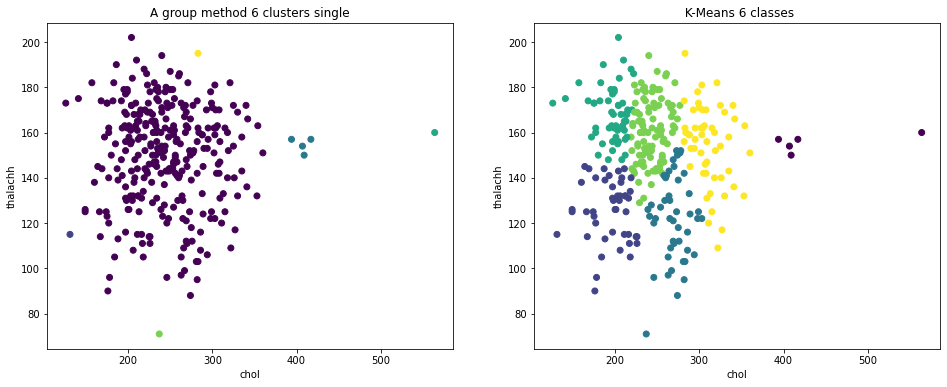

{'n_clusters': 2, 'metric': None, 'linkage': 'single'}

In [30]:
grid_sc(dataset,n_clusters_lim = 7,metric=[None], linkage=['ward', 'complete', 'average', 'single'], comp=False)

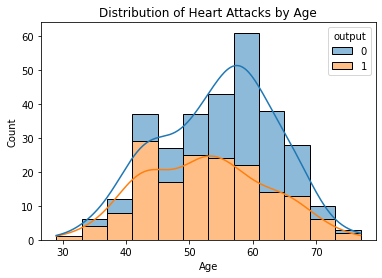

Feature Importance for Number of Major Vessels: 0.11553321730454934


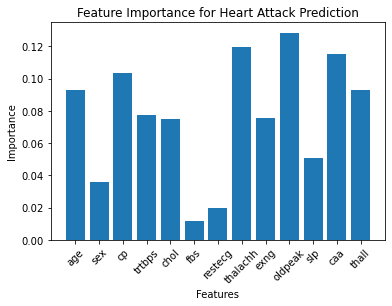

In [12]:
# Question 1: Age Range and Peak for Heart Attacks
# Visualize the distribution of heart attacks based on age
sns.histplot(data=dataset, x='age', hue='output', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Heart Attacks by Age')
plt.show()

# Prepare the data for the Random Forest model
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Question 4: Number of Major Vessels and Heart Attacks
# Train a Random Forest model to predict the number of major vessels affecting heart attacks
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance for the number of major vessels
feature_importances = rf_model.feature_importances_
major_vessels_index = X.columns.get_loc('caa')
major_vessels_importance = feature_importances[major_vessels_index]

print('Feature Importance for Number of Major Vessels:', major_vessels_importance)

# Visualizing feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance for Heart Attack Prediction')
plt.show()


In [26]:
#How does the combination of age, chest pain type, and maximum heart rate achieved relate to the likelihood of a heart attack?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'path_to_heart.csv' with the actual path)
data = pd.read_csv("C:\\Users\\jeet3\\Desktop\\Kaggle dataset\\heart.csv")

# Display the column names to choose the correct features and target
print("Column names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


Accuracy: 0.7377049180327869
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        29
           1       0.79      0.69      0.73        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



C:\Users\jeet3\AppData\Local\Temp\ipykernel_29352\2943981312.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'cp_encoded'] = label_encoder.fit_transform(X['cp'])
C:\Users\jeet3\AppData\Local\Temp\ipykernel_29352\2943981312.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('cp', axis=1, inplace=True)


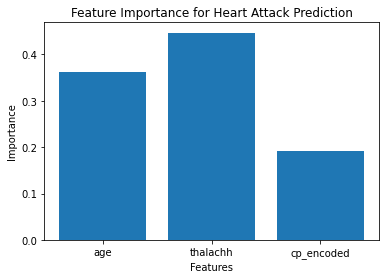

In [29]:
# Update features and target based on the new question
features = ['age', 'cp', 'thalachh']
target = 'output'

# Prepare the data for the Random Forest model
X = data[features]
y = data[target]

# Encode the 'cp' (chest pain type) feature
label_encoder = LabelEncoder()
X.loc[:, 'cp_encoded'] = label_encoder.fit_transform(X['cp'])

# Drop the 'cp' column
X.drop('cp', axis=1, inplace=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize feature importances
feature_importances = rf_model.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Heart Attack Prediction')
plt.show()
